In [3]:
import os
import sys
import pandas as pd
import yfinance as yf
import plotly as px

import talib as ta
import matplotlib.pyplot as plt





In [2]:
# current working directory
current_dir=os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir=os.path.dirname(current_dir)
print(parent_dir)

# Insert the path to parent directory
sys.path.insert(0,parent_dir)

c:\Users\HP\Desktop\10 Acadamy\AIM Week 1\AIM-Week-1\AIM-WEEK-1\notebooks
c:\Users\HP\Desktop\10 Acadamy\AIM Week 1\AIM-Week-1\AIM-WEEK-1


In [4]:
#read and print stovk tickers
data=pd.read_csv("../data/AAPL_historical_data.csv",parse_dates=["Date"])
# Ensure data has required columns
print(data.head())
print(data.info())

# Sorting the data by Date for consistency
data = data.sort_values(by="Date", ascending=True).reset_index(drop=True)

        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       

In [5]:
# Simple Moving Averages (SMA) and Exponential Moving Averages (EMA)
data['SMA_50'] = ta.SMA(data['Close'], timeperiod=50)
data['SMA_200'] = ta.SMA(data['Close'], timeperiod=200)
data['EMA_50'] = ta.EMA(data['Close'], timeperiod=50)


In [8]:
# Calculate RSI (14-period)
data['RSI_14'] = ta.RSI(data['Close'], timeperiod=14)


In [11]:
# MACD calculation
data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = ta.MACD(
    data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


In [15]:
import yfinance as yf

# Download historical data for AAPL (or another ticker)
ticker = "AAPL"
historical_data = yf.download(ticker, start="1980-12-12", end="2024-06-01")

# Display the last few rows
print(historical_data.tail())


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2024-05-24  189.551804  189.979996  190.580002  188.039993  188.820007   
2024-05-28  189.561783  189.990005  193.000000  189.100006  191.509995   
2024-05-29  189.861115  190.289993  192.250000  189.509995  189.610001   
2024-05-30  190.858856  191.289993  192.179993  190.630005  190.759995   
2024-05-31  191.816681  192.250000  192.570007  189.910004  191.440002   

Price         Volume  
Ticker          AAPL  
Date                  
2024-05-24  36294600  
2024-05-28  52280100  
2024-05-29  53068000  
2024-05-30  49947900  
2024-05-31  75158300  


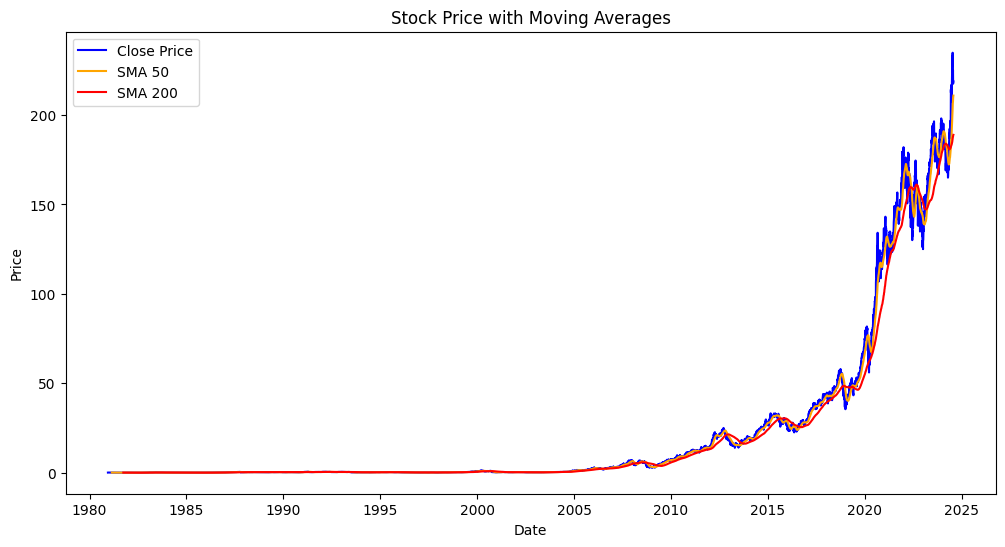

In [6]:
#Price Chart with SMA and EMA
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label="Close Price", color='blue')
plt.plot(data['Date'], data['SMA_50'], label="SMA 50", color='orange')
plt.plot(data['Date'], data['SMA_200'], label="SMA 200", color='red')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


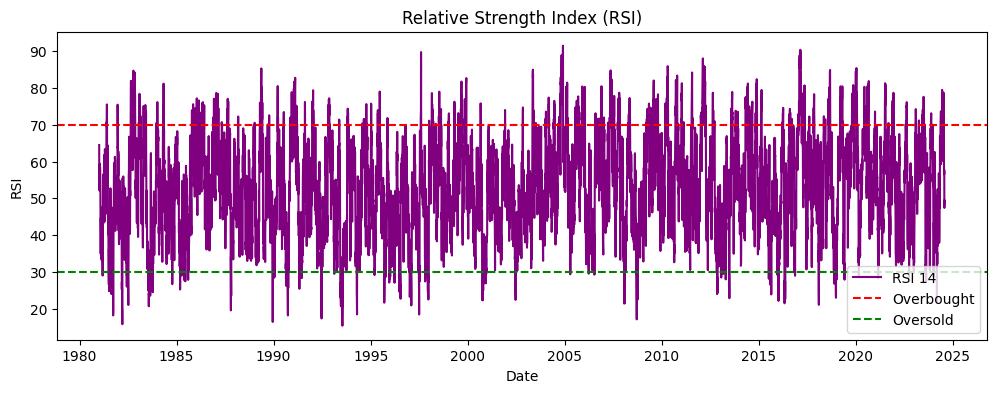

In [9]:
#RSI Visualization
plt.figure(figsize=(12, 4))
plt.plot(data['Date'], data['RSI_14'], label="RSI 14", color='purple')
plt.axhline(70, color='red', linestyle='--', label="Overbought")
plt.axhline(30, color='green', linestyle='--', label="Oversold")
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()


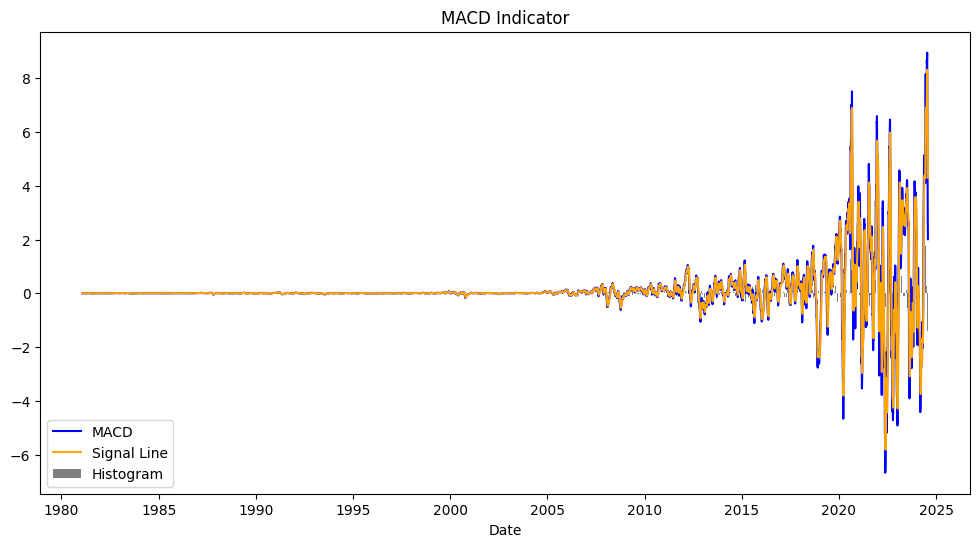

In [12]:
#MACD Visualization
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['MACD'], label="MACD", color='blue')
plt.plot(data['Date'], data['MACD_Signal'], label="Signal Line", color='orange')
plt.bar(data['Date'], data['MACD_Hist'], label="Histogram", color='gray')
plt.title("MACD Indicator")
plt.xlabel("Date")
plt.legend()
plt.show()
